In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [58]:
data = pd.read_csv("C:\\Users\\PAWAN\\Downloads\\Project+2+-+Cars+Dataset.csv")
data= data.dropna()
data.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [59]:
data["MPG"]=(data["MPG_City"]+data["MPG_Highway"])/2

## 1. Data Understanding



What is the shape of the dataset (rows × columns)?



In [60]:
data.shape

(426, 16)

What are the data types of each column (categorical, numerical, etc.)?



In [61]:
data.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower     float64
MPG_City       float64
MPG_Highway    float64
Weight         float64
Wheelbase      float64
Length         float64
MPG            float64
dtype: object

Are there missing values? How many per column?



In [62]:
data.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
MPG            0
dtype: int64

Are there duplicate rows or columns?



In [63]:
data.duplicated().sum()

np.int64(0)

What is the summary of numerical columns (mean, median, min, max, std)?



In [64]:
data.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MPG
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,3.205634,5.807512,215.877934,20.070423,26.854460,3580.474178,108.164319,186.420188,23.462441
std,1.103520,1.558443,71.991040,5.248616,5.752335,759.870073,8.330030,14.366611,5.418899
min,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000,11.000000
25%,2.400000,4.000000,165.000000,17.000000,24.000000,3111.250000,103.000000,178.000000,20.500000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3476.000000,107.000000,187.000000,23.000000
75%,3.900000,6.000000,255.000000,21.750000,29.000000,3979.250000,112.000000,194.000000,25.500000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000,63.000000


What is the distribution of categorical variables (e.g., car Make, Type, Origin)?

In [65]:
data.select_dtypes(include="object").columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice'], dtype='object')

In [66]:
data[["MSRP","Invoice"]]

,MSRP,Invoice
0,"$36,945","$33,337"
1,"$23,820","$21,761"
2,"$26,990","$24,647"
3,"$33,195","$30,299"
4,"$43,755","$39,014"
...,...,...
427,"$40,565","$38,203"
428,"$42,565","$40,083"
429,"$45,210","$42,573"
430,"$26,135","$24,641"


In [67]:
for i in data.drop(columns=["Invoice"]).select_dtypes(include="object").columns:
    
    print(f"{i}: {data[i].nunique()}")

Make: 38
Model: 423
Type: 6
Origin: 3
DriveTrain: 3
MSRP: 409


In [68]:
for i in data.select_dtypes(include="object").columns:
    
    print(data[i].value_counts())

Make
Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Nissan           17
Honda            17
Chrysler         15
Volkswagen       15
Mitsubishi       13
Dodge            13
Volvo            12
Hyundai          12
Jaguar           12
Pontiac          11
Kia              11
Subaru           11
Lexus            11
Mazda             9
Buick             9
Mercury           9
Lincoln           9
Cadillac          8
GMC               8
Saturn            8
Suzuki            8
Infiniti          8
Acura             7
Saab              7
Porsche           7
Land Rover        3
Oldsmobile        3
Jeep              3
Isuzu             2
MINI              2
Scion             2
Hummer            1
Name: count, dtype: int64
Model
G35 4dr                           2
C240 4dr                          2
C320 4dr                          2
XC70                              1
MDX                               1
                       

Visualize with bar plots

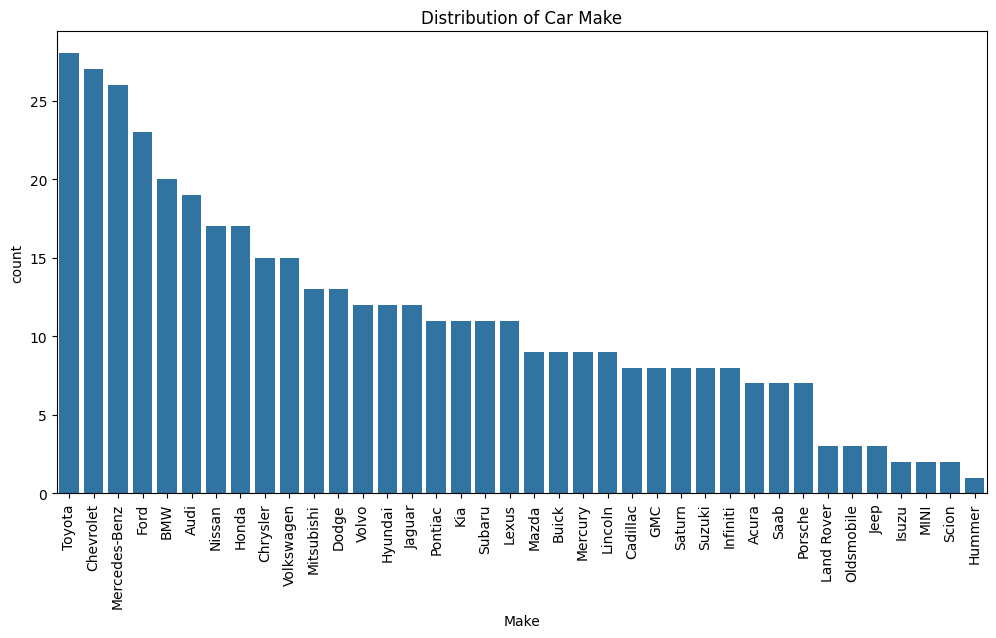

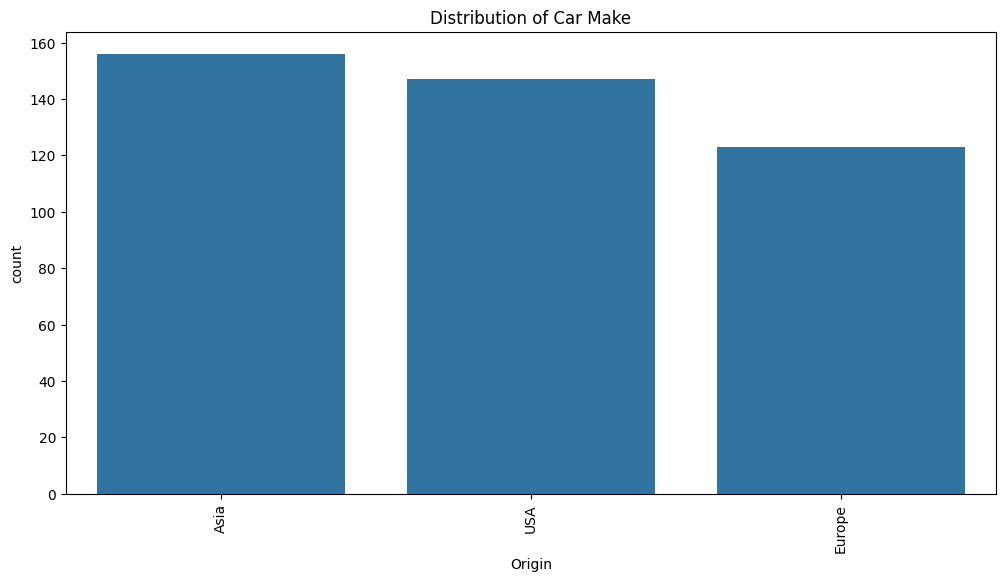

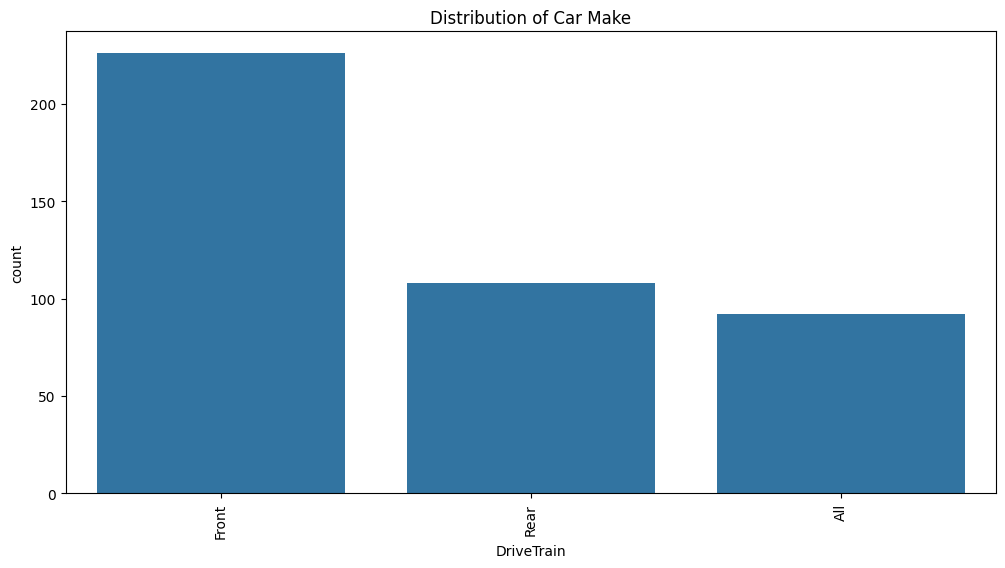

In [69]:
# plt.subplot(nrows, ncols, index)

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Make', order=data['Make'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Car Make")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Origin', order=data['Origin'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Car Make")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='DriveTrain', order=data['DriveTrain'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Car Make")
plt.show()

2. Univariate Analysis (One variable at a time)

What is the most expensive car (MSRP) and the least expensive?



In [70]:
data["MSRP"]=data["MSRP"].convert_dtypes("float")

In [71]:
print("Most Expensive")
data[["Make","Model","MSRP"]][data["MSRP"]==data["MSRP"].max()]


Most Expensive


,Make,Model,MSRP
265,Mercedes-Benz,CL500 2dr,"$94,820"


In [72]:
print("Least Expensive")
data[["Make","Model","MSRP"]][data["MSRP"]==data["MSRP"].min()]

Least Expensive


,Make,Model,MSRP
210,Kia,Rio 4dr manual,"$10,280"


What is the most common car Type (SUV, Sedan, etc.)?



In [73]:
most_common_car_type=data["Type"].mode()[0]
print(f"Most Common Car Type: {most_common_car_type}")

Most Common Car Type: Sedan


What is the average horsepower, engine size, MPG, etc.?



In [74]:
avg_HP = data["Horsepower"].mean()
avg_engine_size = data["EngineSize"].mean()
avg_MPG_city = data["MPG_City"].mean()
avg_MPG_highway = data["MPG_Highway"].mean()

print(f"Average Horsepower {avg_HP}")
print(f"Average engine size {avg_engine_size}")
print(f"Average MPG city {avg_MPG_city}")
print(f"Average MPG highway {avg_MPG_highway}")

Average Horsepower 215.87793427230048
Average engine size 3.205633802816901
Average MPG city 20.070422535211268
Average MPG highway 26.854460093896712


Which Make (brand) has the most models?



In [75]:
data["Make"].value_counts().idxmax()

'Toyota'

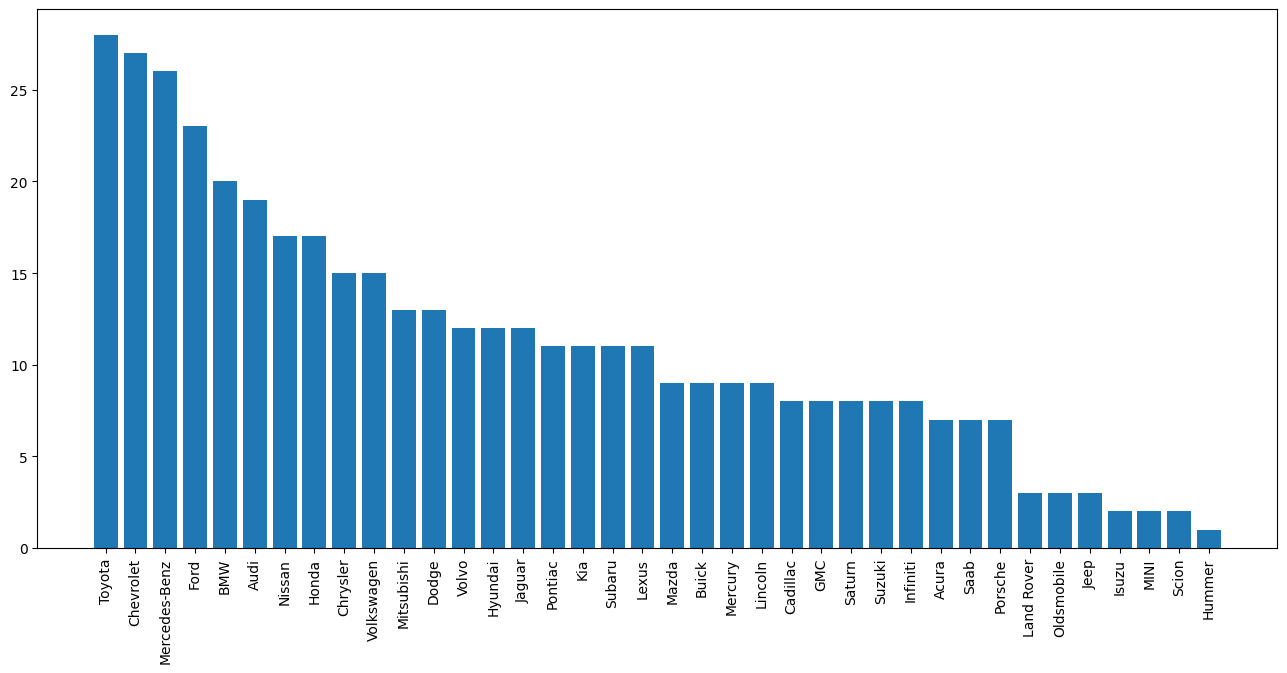

In [76]:
most_models = data["Make"].value_counts()
plt.figure(figsize=(16,7))
plt.bar(most_models.index,most_models.values)
plt.xticks(rotation=90)
plt.show()

Which Origin (USA, Asia, Europe) dominates the dataset?

In [77]:
data["Origin"].unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

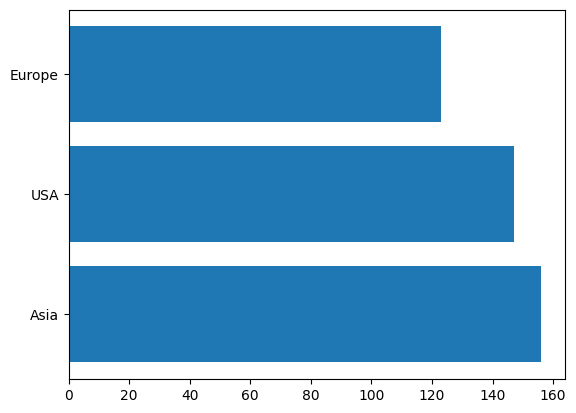

In [78]:
Origin = data["Origin"].value_counts()

plt.barh(Origin.index,Origin.values)
plt.show()

# Multivariate Analysis (More than two variables)

What factors (Engine Size, Horsepower, Cylinders, Weight) best explain car Price (MSRP)?

In [79]:
data["MSRP"] = (data["MSRP"].replace('[\$,]', '', regex=True).str.strip().astype("float64"))


In [80]:
print(data["MSRP"].corr(data["EngineSize"]),
"\n",data["MSRP"].corr(data["Horsepower"]),
"\n",data["MSRP"].corr(data["Cylinders"]),
"\n",data["MSRP"].corr(data["Weight"]))

0.573238186791028 
 0.8272957229087013 
 0.6497419270432131 
 0.4479869103267083


<Axes: >

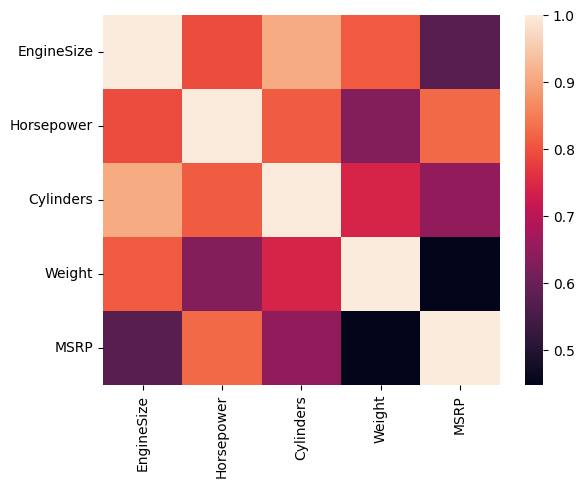

In [81]:
correlation=data[["EngineSize","Horsepower","Cylinders","Weight","MSRP"]].corr()
sns.heatmap(correlation)


<Axes: xlabel='MSRP', ylabel='Weight'>

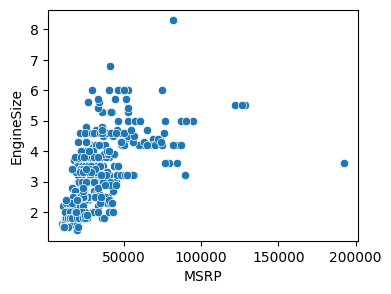

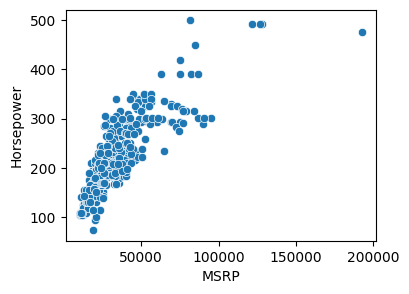

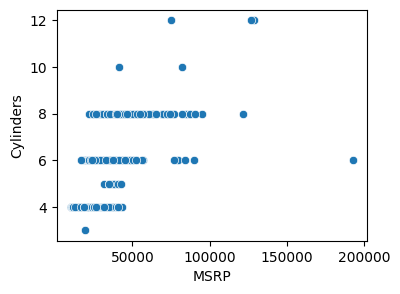

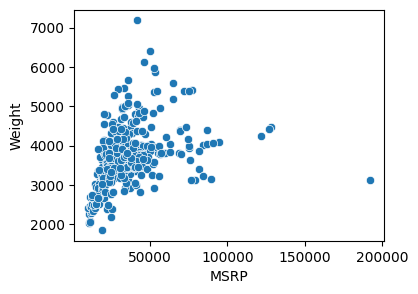

In [82]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=data,x="MSRP",y="EngineSize")

plt.figure(figsize=(4,3))
sns.scatterplot(data=data,x="MSRP",y="Horsepower")

plt.figure(figsize=(4,3))
sns.scatterplot(data=data,x="MSRP",y="Cylinders")

plt.figure(figsize=(4,3))
sns.scatterplot(data=data,x="MSRP",y="Weight")

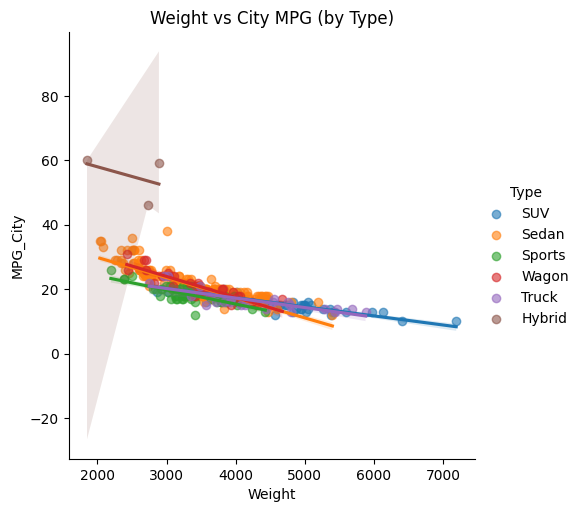

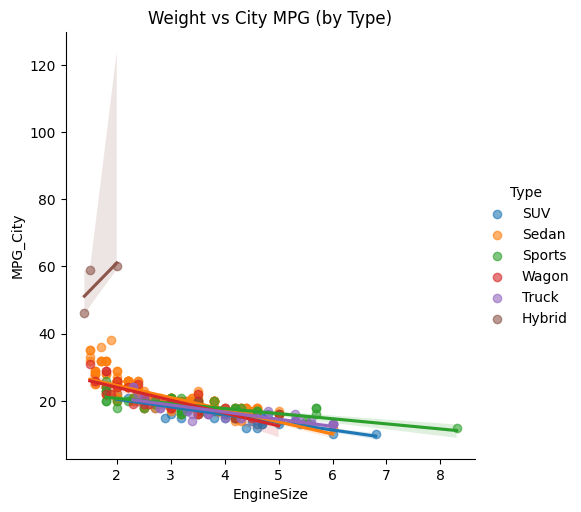

In [83]:
sns.lmplot(data=data, x='Weight', y='MPG_City', hue='Type', scatter_kws={'alpha':0.6})
plt.title("Weight vs City MPG (by Type)")
plt.show()

sns.lmplot(data=data, x='EngineSize', y='MPG_City', hue='Type', scatter_kws={'alpha':0.6})
plt.title("Weight vs City MPG (by Type)")
plt.show()

In [84]:
data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length', 'MPG'],
      dtype='object')

Do heavier cars with bigger engines always have lower MPG?



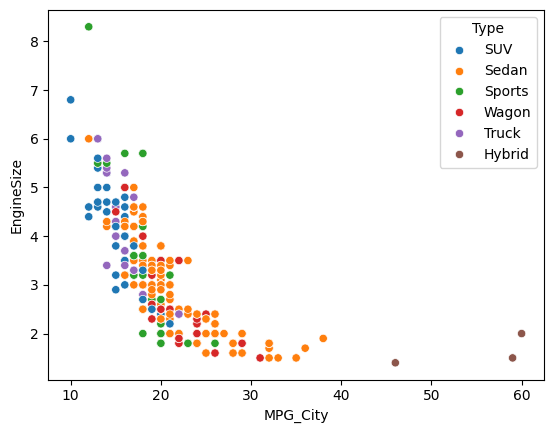

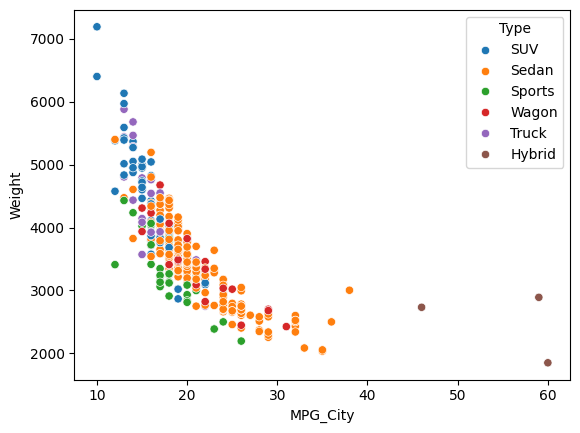

In [85]:
sns.scatterplot(data=data, x="MPG_City",y="EngineSize",hue="Type")
plt.show()

sns.scatterplot(data=data, x="MPG_City",y="Weight",hue="Type")
plt.show()

Are there clear clusters of cars (luxury, economy, sports) if we combine features like horsepower, weight, mpg, and price?

In [86]:
data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length', 'MPG'],
      dtype='object')

In [87]:
from sklearn.cluster import KMeans

In [88]:
x=data[["Horsepower","Weight","MPG","MSRP"]].copy()
x=x.dropna()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled= scaler.fit_transform(x)

In [89]:
x.isnull().sum()

Horsepower    0
Weight        0
MPG           0
MSRP          0
dtype: int64

In [90]:
K= KMeans(n_clusters=3,random_state=42)

clusters= K.fit_predict(x_scaled)

In [91]:
clusters

array([2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0,

In [92]:
data["Clusters"]=clusters

 5. Business/Domain-Oriented Questions

What is the profit margin (MSRP – Invoice) for different car brands?

Which car manufacturers price their vehicles the highest relative to engine power?

Which cars offer the best fuel efficiency per price (MPG per dollar)?

Which Type of car offers the best value (low price, high mileage)?

Are European cars more expensive than American or Asian cars?

Which car brands focus more on performance (high horsepower) vs. efficiency (high MPG)?

🔹 6. Advanced/ML-Oriented Questions

Can we predict car price (MSRP) from the other features?

Can we classify cars into their correct Type based on specifications?

Can we cluster cars into similar groups without using the Type column?

What are the most important features influencing car prices?

🔹 7. Visualization-Oriented Questions

What does the distribution of MSRP look like (histogram)?

What is the correlation heatmap of all numerical features?

Boxplot of MSRP by Type (to compare car types).

Scatterplot of Horsepower vs MSRP (with color = Type).

Bar chart of average MPG_City by Origin.

Trend: How does Weight affect Highway MPG?